We start the second task with the same preprocessing steps as in the first part. Briefly, we remove all NA and dyads with less when 22 iteractions per refery. After that we aggregate values using variance for standard errors and mean for the rest we also drop cathegorical columns just to avoid curse of dimonsionality and noise.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations

from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error

In [13]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')

In [14]:
Refs = df.refNum.value_counts()
validRefs = Refs[Refs>21]
df=df[df['refNum'].isin(validRefs.index.values)]

In [15]:
df.birthday = pd.to_datetime(df.birthday)
df['age'] = 2013 - df.birthday.dt.year

In [16]:
df['target'] = (df.rater1+df.rater2)/2

We keep only referee related information

In [17]:
df.drop(['player', 'photoID', 'birthday', 'rater1', 'rater2', 'club', 'leagueCountry', 'position',
        'age', 'height', 'weight'], inplace=True, axis=1)
df.dropna(axis=0, subset=['target'], inplace=True)

In [92]:
df_mean = df.groupby(['playerShort'])['target', 'games', 'victories', 
                                      'ties', 'defeats', 'goals',
                                      'yellowCards', 'yellowReds', 'redCards', 'meanIAT', 'nIAT',
                                      'meanExp', 'nExp'].mean().reset_index()

In [93]:
df_std = df.groupby(['playerShort'])['seIAT','seExp'].std().reset_index()

In [94]:
len(df_mean),len(df_std)

(1584, 1584)

In [95]:
df_all = df_mean.merge(df_std,on='playerShort')

In [96]:
df_all.fillna(df_all.mean(), inplace=True)

,playerShort,target,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,meanIAT,nIAT,meanExp,nExp,seIAT,seExp
0,aaron-hughes,0.125,4.108974,1.557692,1.128205,1.423077,0.057692,0.121795,0.000000,0.000000,0.344759,20088.589744,0.487879,21033.250000,0.000707,0.003308
1,aaron-hunt,0.125,3.463158,1.473684,0.736842,1.252632,0.621053,0.410526,0.000000,0.010526,0.349332,26877.147368,0.453989,27659.842105,0.000508,0.002356
2,aaron-lennon,0.250,4.079208,1.980198,0.960396,1.138614,0.306931,0.108911,0.000000,0.000000,0.345893,21234.861386,0.491482,22238.742574,0.001220,0.008723
3,aaron-ramsey,0.000,2.591837,1.479592,0.428571,0.683673,0.397959,0.316327,0.000000,0.010204,0.346790,40568.571429,0.511650,42088.153061,0.001406,0.009682
4,abdelhamid-el-kaoutari,0.250,3.351351,1.108108,1.081081,1.162162,0.027027,0.216216,0.108108,0.054054,0.331600,2832.351351,0.335587,2953.837838,0.006216,0.023134
5,abdou-traore_2,0.750,2.309524,0.976190,0.547619,0.785714,0.071429,0.261905,0.023810,0.000000,0.320079,4523.666667,0.296562,4741.404762,0.011977,0.028650
6,abdoulaye-diallo_2,0.875,1.200000,0.400000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.341625,2646.700000,0.400818,2762.500000,0.000269,0.001173
7,abdoulaye-keita_2,0.875,1.500000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.355406,1728.000000,0.417225,1808.500000,0.000398,0.001685
8,abdoulwhaid-sissoko,1.000,2.160714,0.607143,0.446429,1.107143,0.053571,0.375000,0.000000,0.035714,0.348178,2470.196429,0.429630,2593.214286,0.000038,0.000205
9,abdul-rahman-baba,0.875,1.851852,0.629630,0.296296,0.925926,0.000000,0.111111,0.000000,0.037037,0.342072,6829.629630,0.361068,7039.222222,0.000393,0.002305


We take our numerical features which we need to scale before we apply KMeans

In [147]:
features = [col for col in df_all.columns if col not in ['playerShort', 'target', 'cls']]
X = df_all[features].copy()
X = scale(X)

clst = KMeans(n_clusters=2, random_state=42).fit(X)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, skincolor, metric='euclidean'))
df_all['cls'] = clst.labels_

Silhouette Coefficient: -0.047


/Users/hal/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Coefficient around 0 tells us about cluster overlapping. Let's check the distribuion of skinscolour values in clusters to see if they represent player split by colour.

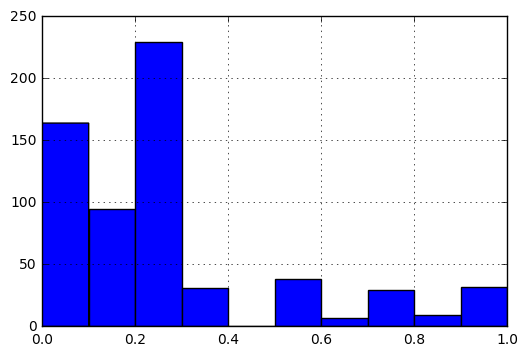

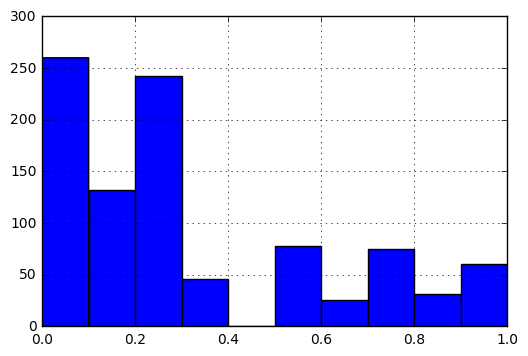

In [137]:
df_all[df_all.cls == 1].target.hist()
plt.show()
df_all[df_all.cls == 0].target.hist()
plt.show()

Apperently this is not the case and split done by other criterias. We can try to remove all referee related information and check the results.

In [148]:
features = [col for col in df_all.columns if col not in ['playerShort', 'target', 'cls', 'meanIAT','nIAT','meanExp','nExp','seIAT','seExp']]
X = df_all[features].copy()
X = scale(X)

clst = KMeans(n_clusters=2, random_state=42).fit(X)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, skincolor, metric='euclidean'))
df_all['cls'] = clst.labels_

Silhouette Coefficient: -0.115


/Users/hal/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


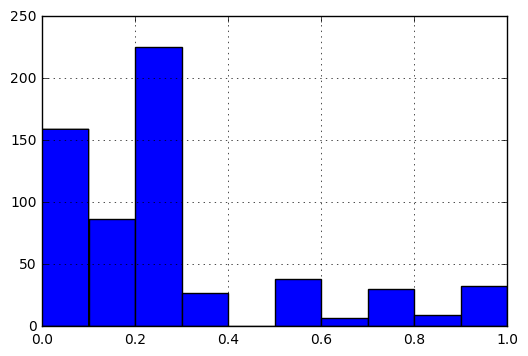

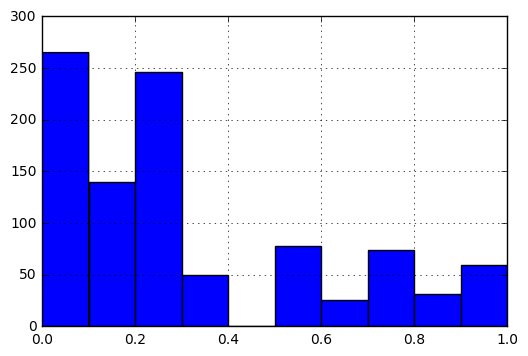

In [150]:
df_all[df_all.cls == 1].target.hist()
plt.show()
df_all[df_all.cls == 0].target.hist()
plt.show()

Nothing has changed so much. What if we keep only field with cards information and remove player related stats.

In [152]:
features = [col for col in df_all.columns if col not in ['playerShort', 'target', 'cls', 'meanIAT','nIAT','meanExp','nExp','seIAT','seExp', 'games','victories','ties','defeats','goals']]
X = df_all[features].copy()
X = scale(X)

clst = KMeans(n_clusters=2, random_state=42).fit(X)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, skincolor, metric='euclidean'))
df_all['cls'] = clst.labels_

Silhouette Coefficient: -0.162


/Users/hal/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


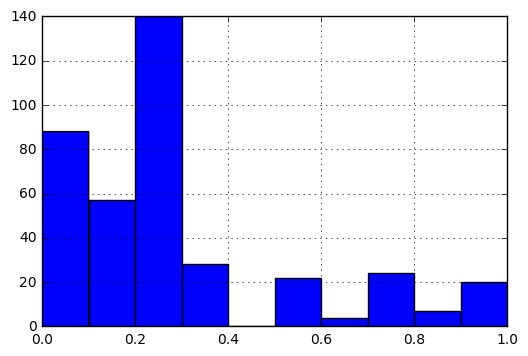

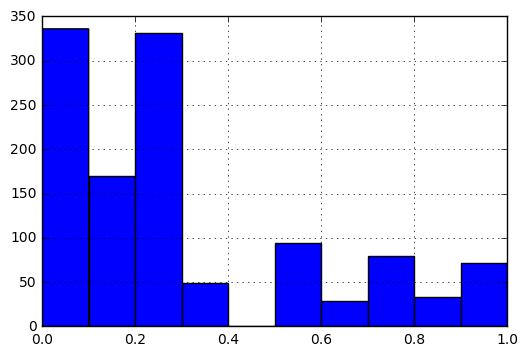

In [153]:
df_all[df_all.cls == 1].target.hist()
plt.show()
df_all[df_all.cls == 0].target.hist()
plt.show()

Silhouette Coefficient is going down, which is not good but no clusters showing separation based on skin colour.